# Ecuaciones diferenciales de primer orden con una variable - Física Computacional

## Método de Euler

Supongamos que tenemos de manera general
$$\frac{dy}{dx}=f(x,y)$$

Con una condición inicial en $x$ y $y$. Expandiendo $y(x+h)$ en serie de Taylor:
$$
y(x+h)=y(x)+h\frac{dy}{dx}+\frac{1}{2}h^2\frac{d^2y}{dx^2}+\cdots\\
       =y(x)+hf(x,y)+O(h^{2})
$$

A programar:

$$
y(x+h)=y(x)+hf(x,y)
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9a/Metodo_de_Euler.png" alt="Metodo de Euler.png" height="560" width="800"></a><br>De <a href="//commons.wikimedia.org/w/index.php?title=User:Raknall&amp;action=edit&amp;redlink=1" class="new" title="User:Raknall (page does not exist)">Raknall</a> - <span class="int-own-work" lang="es">Trabajo propio</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=50002681">Enlace</a></p>

El error de truncamiento o error local es $h^2$. Cada paso tiene este error. Sin embargo, a lo largo de los 1000 pasos, se obtiene un error acumulado o el error global del método numérico.

El error global se obtiene sumando N-1 veces el error local:
$$
\sum_{k=0}^{N-1} \frac{1}{2}h^2\left[\frac{d^2y}{dx^2} \right]_{x=x_k}=
\frac{1}{2}h\sum_{k=0}^{N-1}h\left[\frac{df}{dx} \right]_{x=x_k}\approx
\frac{h}{2}\int_a^b\frac{df}{dx} dx=\frac{h}{2}\left[f(y(b),b)-f(y(a),a)\right]
$$

Entonces, el error global es proporcional a $h$

**Ejercicio 1:**

$$\frac{dx}{dt}=-x^3+\sin(t)$$

Haz un programa que grafique t en el intervalo [0,10] con 1000 pasos

Text(0, 0.5, 'x(t)')

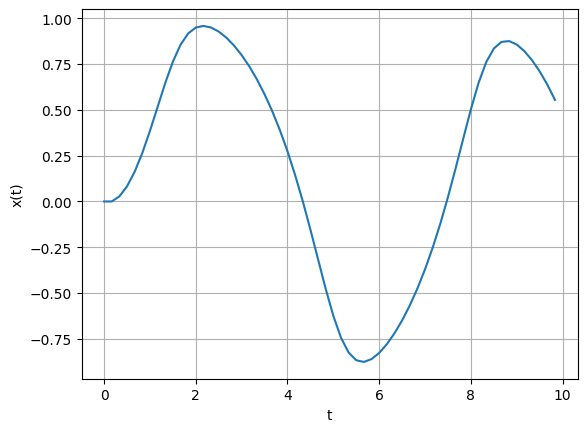

In [ ]:
#Método de Euler
import numpy as np
import matplotlib.pyplot as plt

f=lambda x,t: -x**3 + np.sin(t)

a,b=0.0,10.0
N=60
h=(b-a)/N
x=0.0

puntos_t=[]
puntos_x=[]

for t in np.arange(a,b,h):
    puntos_x.append(x)
    x+=h*f(x,t)  #Metodo de Euler
    puntos_t.append(t)


plt.plot(puntos_t,puntos_x)
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')


**Ejercicio 2: Ley de enfriamiento de Newton**

$$
\frac{dT}{dt} = -k(T - T_{amb})
$$

Considerando $k = \frac{1}{2}, T_{amb} = 23 C$ y $T(0) = 100$  

In [ ]:
def Temp(t):
    T_amb = 23
    k = 1/2
    T0 = 100

    return T_amb + (T0 - T_amb)*np.exp(-k*t)

Text(0, 0.5, 'T(t)')

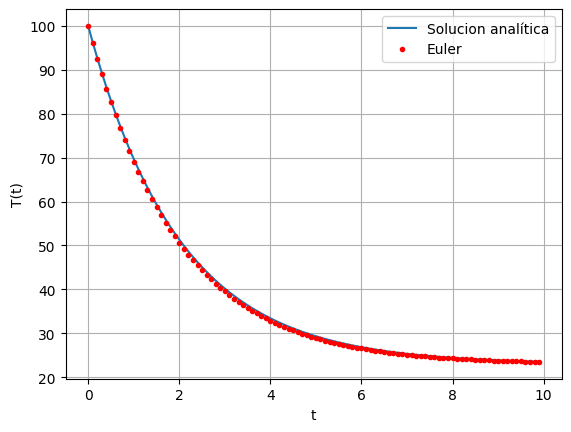

In [ ]:
def f(T):
    T_amb = 23
    k = 1/2

    return -k*(T - T_amb)

a,b = 0,10
N = 100
h = (b-a)/N
T = 100

temperatura = []
tiempo = []

for t in np.arange(a,b,h):

    temperatura.append(T)
    T += h*f(T)
    tiempo.append(t)

plt.plot(tiempo,Temp(np.array(tiempo)), label = 'Solucion analítica')
plt.plot(tiempo,temperatura, 'r.',label = 'Euler')

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('T(t)')

## Método de Runge-Kutta de orden 2

Cuidado: Extender la serie de Taylor a un orden superior no hace que se mejore la solución (sólo en algunos casos). Para mejorar usaremos el método de Runge-Kutta de segundo orden, o también conocido como el método del punto medio.

Dessarrollando con serie de Taylor alrededor de $t+\frac{1}{2}h$ para $x(t+h)$:

$$
x(t+h)=x(t+\frac{1}{2}h)+\frac{1}{2}h \left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+\frac{1}{8}h^2\left(\frac{d^2x}{dt^2}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
$$

Haciendo lo mismo para $x(t)$:

$$
x(t)=x(t+\frac{1}{2}h)-\frac{1}{2}h \left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+\frac{1}{8}h^2\left(\frac{d^2x}{dt^2}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
$$

Restando la segunda expresión de la primera y reacomodando términos:

$$
x(t+h)=x(t)+h\left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
=x(t)+hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)+O(h^{3})
$$

Un detalle importante, no conocemos en realidad $x(t+\frac{1}{2}h)$!

Para eso usamos el método de Euler, de esta manera podemos escribir:

$$
k_1=hf(x,t)\\
k_2=hf(x+\frac{1}{2}k_1,t+\frac{1}{2}h)\\
x(t+h)=x(t)+k_2
$$


Ya vimos que $x(t+h)$ tiene terminos de $O(h^{3})$ lo cual es aún mejor que el de Euler ($O(h^{2})$). Pero estamos asumiendo que usar Euler para la estimación original no mete terminos en Runge-Kutta en $x(t+h)$ mayores que $O(h^{3})$.

Si haces una demostración correcta de porque este es el caso y lo expones en video tendras medio punto extra sobre esta tarea. (Hint: demuestra que $k_2$ va como $O(h^{3})$, expandiendo en serie de Taylor $f$ y $x$ alrededor de $t+\frac{1}{2}h$)



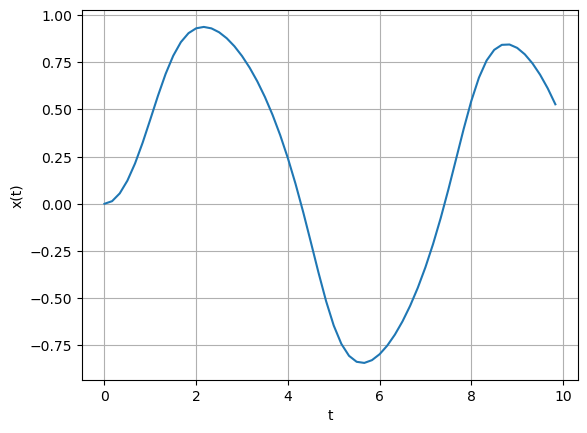

In [ ]:
#Runge Kutta de orden 2 o Método del punto medio

f=lambda x,t: -x**3 + np.sin(t)

a,b=0.0,10.0
N=60
h=(b-a)/N
x=0.0

puntos_t=[]
puntos_x=[]

for t in np.arange(a,b,h):

    puntos_x.append(x)

    k1=h*f(x,t)
    k2=h*f(x+0.5*k1,t+0.5*h)
    x = x + k2
    puntos_t.append(t)

plt.plot(puntos_t,puntos_x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

Text(0, 0.5, 'T(t)')

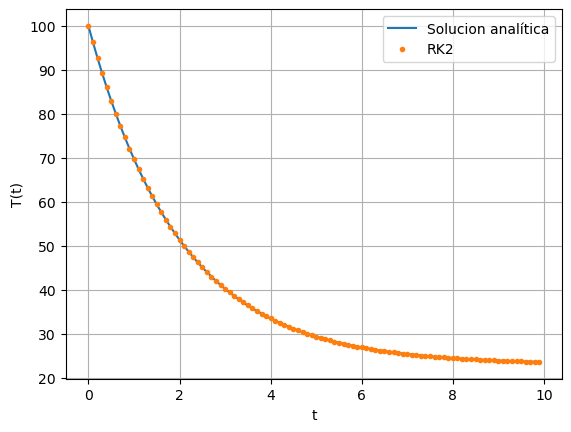

In [ ]:
def f(T):
    T_amb = 23
    k = 1/2

    return -k*(T - T_amb)

a,b = 0,10
N = 100
h = (b-a)/N
T = 100

temperatura = []
tiempo = []

for t in np.arange(a,b,h):

    temperatura.append(T)

    k1=h*f(T)
    k2=h*f(T+0.5*k1)
    T+=k2

    tiempo.append(t)

plt.plot(tiempo,Temp(np.array(tiempo)), label = 'Solucion analítica')
plt.plot(tiempo,temperatura, '.' ,label = 'RK2')


plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('T(t)')

# Ecuaciones de Balance

Entonces, ¿cuál es la idea aquí? Basicamente, la idea consiste en describir la variación de una cantidad dada en un sistema dinámico. Esta variación será cambiada por una creación de una cantidad o destrucción de una cantidad. Así, en la clase de **Sistemas dinámicos** se dio la variación de la población en términos de los nacimientos menos las muertes. Así que podemos simplemente, de una manera formal, escribirlo con nuestras notaciones para sistemas dinámicos.

$$
 \dot{s} = f(t) = \text{variación de cantidad} = \text{tasa de creación} - \text{tasa de destrucción}\\
$$

Ahora si queremos escribirlo también para un sistema discreto, lo que vamos a escribir es que básicamente la evolución, la variación de $s$.

$$
s(t + \Delta t) - s(t) = \Delta t( \text{tasa de creación} - \text{tasa de destrucción})
$$

Así que algo que es bueno notar aquí es que $\Delta t \to 0$, simplemente tenemos exactamente la misma ecuación que para el caso continuo. ¿Por qué es eso? Si dividimos nuestra primera ecuación por $\Delta t$ tenemos

$$
\lim_{\Delta \to 0}\frac{s(t + \Delta t) - s(t)}{\Delta t} = \dot{s}
$$

Así que para ilustrar estas ecuaciones de equilibrio, podemos considerar un sistema que es un poco más complejo.

## Modelo Lotka–Volterra (Presa - Depredador)
### Población de antílopes y guepardos.

Consideramos un sistema que contiene dos poblaciones, una población de antílopes, que es una presa, y una población de depredadores, que son los guepardos. Así que, básicamente, un guepardo comerá antílopes y los antílopes se reproducirán y el único otro proceso que consideraremos es que los guepardos morirán.

Podemos describir este sistema mediante las siguientes ecuaciones:

$$
\begin{align}
\frac{da}{dt} =& k_aa(t) - k_{c,a}c(t)a(t)\\
\frac{dc}{dt} =& -k_cc(t) + k_{a,c}c(t)a(t)
\end{align}
$$

En la primera ecuación, tenemos la variación de la población de antílopes: $\frac{da}{dt}$. Que es igual a sus reproducciones por la tasa de natalidad de los antílopes ($k_a$) y entonces el segundo es el ritmo con el que los antílopes serán comidos por los guepardos. Así que este proceso es proporcional a la probabilidad de que se encuentren, así que básicamente, este término es, por supuesto, negativo porque disminuirá la población de los antílopes. Y será dada por una constante de proporcionalidad o tasa de ser comido ($k_{c,a}$). Evidentemente $c(t)$ es la población de guerpardos.

Luego, en la segunda ecuación, describimos la evolución de la población de guepardos, que se denota por $c(t)$. Y así el primer término de esta ecuación, es una disminución exponencial de la población de guepardos. Así que aquí asumimos que los guepardos no se reproducen solos si no son alimentados. Lo que significa que en ausencia de cualquier antílope, los guepardos simplemente morirán de hambre. Y este tipo de tasa de muerte es menos una constante ($k_c$), veces el número de guepardos en la población. Y el segundo término de esta ecuación, es el crecimiento de la población, que es proporcional a las probabilidades de que el guepardo coma antílopes. Así que tenemos otra constante de proporcionalidad, que es $k_{a,c}$ que describe el crecimiento de la población de guepardos. Así que este sistema se puede resolver analíticamente, pero no es el punto aquí.

In [ ]:
ka = 0.6     # tasa de natalidad de antilopes
kc = 0.3     # tasa de mortalidad de guepardos

kca = 0.06   # tasa de ser comido
kac = 0.02   # tasa de crecimiento poblacional de guepardos

In [ ]:
def a(ai,ci):

    return (ka - kca*ci)*ai

In [ ]:
def c(ai,ci):

    return (-kc + kac*ai)*ci

In [ ]:
N = 1000
h = 150/N # (150 - 0)/ N

A = [30]
C = [10]
t = [0]

i = 0
ti = 0

while ti <= 150:

    ai = A[i] + a(A[i], C[i])*h  # ai + f(a,c)*h
    A.append(ai)

    ci = C[i] + c(A[i], C[i])*h  # ci + g(a,c)*h
    C.append(ci)

    i += 1
    ti += h
    t.append(ti)


In [ ]:
t = np.array(t)
A = np.array(A)
C = np.array(C)

Text(0, 0.5, 'C')

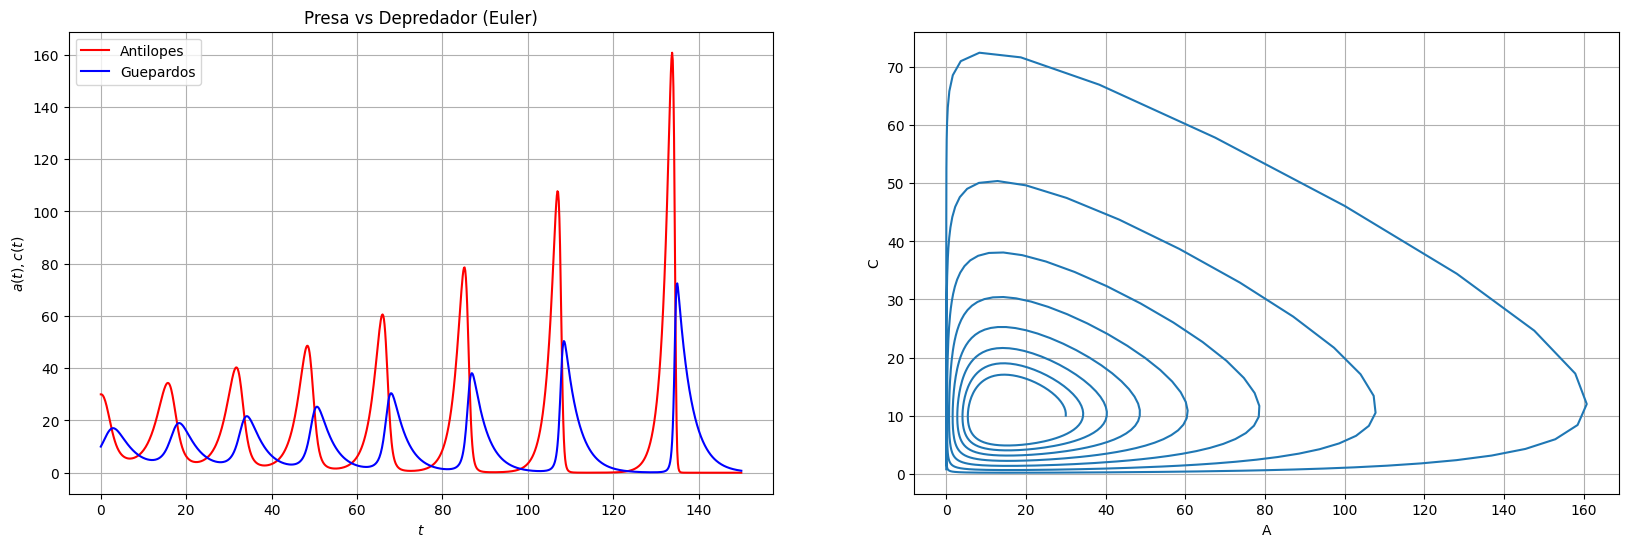

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))


# Primer gráfico
ax1.plot(t,A, "r", label = "Antilopes")
ax1.plot(t,C, "b", label = "Guepardos")
ax1.grid()

ax1.set_title("Presa vs Depredador (Euler)")
ax1.set_xlabel("$t$")
ax1.set_ylabel("$a(t), c(t)$")
ax1.legend()

# Segundo gráfico

ax2.plot(A,C)

ax2.grid()
ax2.set_xlabel("A")
ax2.set_ylabel("C")